In [7]:
conda install -c conda-forge altair vega_datasets

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [8]:
import altair as alt

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
customer_df = pd.read_csv('final/customers.csv', sep='|')

In [11]:
customer_df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [12]:
customer_df.shape

(1000, 15)

In [13]:
import os

directory = './final'
dfs = []

for filename in os.listdir(directory):
    if filename.startswith('transactions'):
        print(f'Reading {filename}...')
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep='|')
        dfs.append(df)
    else:
        print(f'{filename} is not a CSV file. Skipping...')

if len(dfs) > 0:
    transaction_df = pd.concat(dfs, ignore_index=True)
    print(f'Successfully merged {len(dfs)} dataframes into one.')
else:
    print('No CSV files found in directory.')


customers.csv is not a CSV file. Skipping...
Reading transactions_0.csv...
Reading transactions_1.csv...
Reading transactions_10.csv...
Reading transactions_100.csv...
Reading transactions_101.csv...
Reading transactions_102.csv...
Reading transactions_103.csv...
Reading transactions_104.csv...
Reading transactions_105.csv...
Reading transactions_106.csv...
Reading transactions_107.csv...
Reading transactions_108.csv...
Reading transactions_109.csv...
Reading transactions_11.csv...
Reading transactions_110.csv...
Reading transactions_111.csv...
Reading transactions_112.csv...
Reading transactions_113.csv...
Reading transactions_114.csv...
Reading transactions_115.csv...
Reading transactions_116.csv...
Reading transactions_117.csv...
Reading transactions_118.csv...
Reading transactions_119.csv...
Reading transactions_12.csv...
Reading transactions_120.csv...
Reading transactions_121.csv...
Reading transactions_122.csv...
Reading transactions_123.csv...
Reading transactions_124.csv...
Re

In [14]:
transaction_df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [15]:
transaction_df.shape

(4260904, 10)

In [16]:
df = customer_df.merge(transaction_df, on=['cc_num', 'acct_num'])

In [17]:
df.shape

(4260904, 23)

In [18]:
df.isna().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  trans_num   object 
 16  unix_time   object 
 17  category    object 
 18  amt         float64
 19  is_fraud    object 
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(2), object(16)
memory usage: 780.2+ MB


In [21]:
df['is_fraud'].value_counts(normalize=True)

0    0.998819
1    0.001181
Name: is_fraud, dtype: float64

## Data Exploration ##

In [23]:
#There are 14 unique purchase types in 'category'

df['category'].nunique()

14

In [24]:
#There are 939 different zip codes 

df['zip'].nunique()

939

In [25]:
#There are 726 different cities 

df['city'].nunique()

726

In [26]:
#In 51 different states

df['state'].nunique()

51

In [27]:
#There are 505 different occupations represented

print("Total unique jobs in the feature job:\n", df["job"].value_counts(), "\n")

Total unique jobs in the feature job:
 Computer games developer      33859
Radio producer                28746
Patent attorney               27990
Teacher, adult education      27692
General practice doctor       27279
                              ...  
Waste management officer        358
Nurse, learning disability      358
Geneticist, molecular            12
Sales executive                   7
Loss adjuster, chartered          7
Name: job, Length: 505, dtype: int64 



In [28]:
#interested to know what occupations customers have, whether this can be simplified or binned in any way 

job_counts = df["job"].value_counts()
job_unique = np.array(job_counts.index)
job_unique

array(['Computer games developer', 'Radio producer', 'Patent attorney',
       'Teacher, adult education', 'General practice doctor',
       'Accountant, chartered public finance', 'Quarry manager',
       'Chief Financial Officer', 'Sports therapist',
       'Call centre manager', 'Surveyor, hydrographic',
       'Chief Executive Officer', 'Designer, exhibition/display',
       'Sales promotion account executive', 'Data scientist',
       'Camera operator', 'Counselling psychologist',
       'Manufacturing systems engineer', 'Nurse, mental health',
       'Software engineer', 'Immigration officer',
       'Teacher, English as a foreign language', 'Metallurgist',
       'Investment banker, operational', 'Artist',
       'Environmental manager', 'Social research officer, government',
       'Associate Professor', 'Arts development officer',
       'Games developer', 'Chartered accountant',
       'Designer, interior/spatial', 'Engineer, aeronautical',
       'Publishing rights manager',

In [29]:
#Proportion of fraudulent transactions

df['is_fraud'].value_counts(normalize=True)

0    0.998819
1    0.001181
Name: is_fraud, dtype: float64

In [30]:
#Removing fraudulent transactions from the dataframe 

df = df[df['is_fraud'] == 0]

In [116]:
df.shape

(4255870, 23)

## Feature Engineering ##

In [148]:
dff=df.copy()

Gender Label Encoding

In [155]:
#convert 'gender' to numeric using Label Encoding

dff['gender'].value_counts()

F    2173250
M    2082620
Name: gender, dtype: int64

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff['gender'] = le.fit_transform(dff['gender'])
dff['gender'].head(n=20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: gender, dtype: int32

In [36]:
#gender graph 

Now we would like to calculate whether purchases are being made locally or long distance

In [111]:
pip install geopy

In [112]:
from geopy import distance

In [157]:
dff["distance"] = dff.apply(lambda x: distance.distance((x["lat"], x["long"]), (x["merch_lat"], x["merch_long"])).km, axis = 1)
dff['distance'].head()

0     82.942792
1     84.407101
2    121.770076
3     76.818262
4     85.941045
Name: distance, dtype: float64

In [158]:
dff['distance'].describe()

count    4.255870e+06
mean     7.653999e+01
std      2.920159e+01
min      6.766473e-02
25%      5.567865e+01
50%      7.878398e+01
75%      9.894630e+01
max      1.518573e+02
Name: distance, dtype: float64

In [159]:
dff['distance'].median()

78.78397855051824

In [43]:
plt.hist(dff['distance'], color='skyblue', edgecolor=blue)
plt.xlabel('distance km')
plt.ylabel('frequency')
plt.show()

Note that only around 25% of purchases were made < 50km from the customer's home. 

Extract age, and ageband from dob 

In [160]:
import datetime as DT
import io

#convert 'dob' to 'age'
now = pd.Timestamp('now')
dff['dob'] = pd.to_datetime(dff['dob'])   
dff['dob'] = dff['dob'].where(dff['dob'] < now, dff['dob'] -  np.timedelta64(100, 'Y'))   
dff['age'] = (now - dff['dob']).astype('<m8[Y]')   
dff = dff.drop(columns=['dob']) 

In [161]:
#check for outliers
age_counts = dff['age'].value_counts()
age_unique = np.array(age_counts.index)
print(np.sort(age_unique))

[15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.
 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68.
 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86.
 87. 88. 89. 90. 91. 92. 93. 94. 95.]


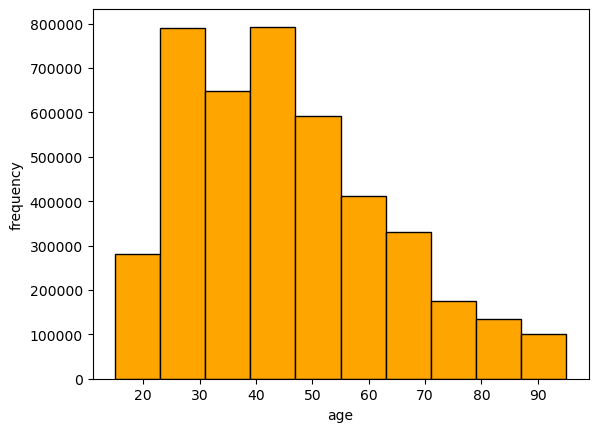

In [163]:
plt.hist(dff['age'], color='orange', edgecolor='black')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [162]:
#organise into age band bins and display as a chart 

bins = [-1,17,25,35,45,55,65,75,85,100]
dff['ageband'] = pd.cut(dff['age'], bins) 

In [173]:
print("Total unique categories in the feature category:\n", dff["ageband"].value_counts(), "\n")

Total unique categories in the feature category:
 (25, 35]     965475
(35, 45]     890006
(45, 55]     748139
(17, 25]     547662
(55, 65]     525034
(65, 75]     293497
(75, 85]     152690
(85, 100]    122191
(-1, 17]      11176
Name: ageband, dtype: int64 



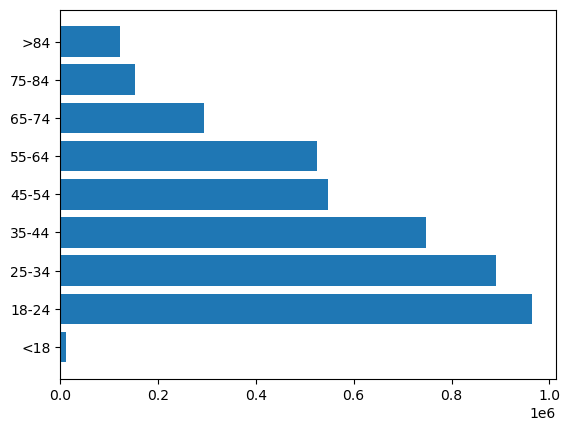

In [221]:
y=[11176, 965475, 890006, 748139, 547662, 525034, 293497, 152690, 122191]
x=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>84']
plt.barh(x,y)
plt.xlabel('number of customers per age band')
plt.ylabel('ageband')
plt.show()

In [181]:
#categories of purchases
print("Total unique categories in the feature category:\n", dff["category"].value_counts(), "\n")

Total unique categories in the feature category:
 shopping_pos      419631
home              403122
grocery_pos       399819
kids_pets         371934
gas_transport     364829
food_dining       320880
entertainment     312328
shopping_net      305855
personal_care     300594
misc_pos          281820
health_fitness    265907
misc_net          190648
grocery_net       181532
travel            136971
Name: category, dtype: int64 



In [149]:
print("Total categories in the feature job:\n", dff["job"].value_counts(), "\n")

Total categories in the feature job:
 Computer games developer      33806
Radio producer                28725
Patent attorney               27963
Teacher, adult education      27684
General practice doctor       27253
                              ...  
Engineer, materials             358
Waste management officer        358
Haematologist                   358
Transport planner               358
Nurse, learning disability      358
Name: job, Length: 502, dtype: int64 



from unix_time we'd like to know the day of the week and the time of day that purchases were made 

In [186]:
from datetime import datetime
 
dff['date_time'] = pd.to_datetime(dff['unix_time'],unit='s')
dff['date_time'].head()

0   2019-05-24 17:39:10
1   2019-09-25 15:31:59
2   2019-12-24 16:40:01
3   2019-10-18 19:50:38
4   2019-02-10 23:13:20
Name: date_time, dtype: datetime64[ns]

In [187]:
dff['date_time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4255870 entries, 0 to 4260903
Series name: date_time
Non-Null Count    Dtype         
--------------    -----         
4255870 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 193.9 MB


In [188]:
date_range = str(dff['date_time'].dt.date.min()) + ' to ' +str(dff['date_time'].dt.date.max())
print(date_range)

2018-12-31 to 2022-12-31


In [193]:
dff['hours'] = dff['date_time'].dt.strftime('%H')
dff['hour'] = dff['hours'].astype(str).astype(int)
dff['weekday'] = dff['date_time'].dt.dayofweek
dff['months'] = dff['date_time'].dt.strftime('%m')
dff['month'] = dff['months'].astype(str).astype(int)
dff['year'] = dff['date_time'].dt.year

In [194]:
dff = dff.drop(columns=['hours', 'months'])
dff.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,merch_lat,merch_long,distance,age,ageband,date_time,hour,weekday,month,year
0,115-04-4507,4218196001337,Jonathan,Johnson,1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,39.491416,-75.588522,82.942792,63.0,"(55, 65]",2019-05-24 17:39:10,17,4,5,2019
1,115-04-4507,4218196001337,Jonathan,Johnson,1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,40.890319,-75.573359,84.407101,63.0,"(55, 65]",2019-09-25 15:31:59,15,2,9,2019
2,115-04-4507,4218196001337,Jonathan,Johnson,1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,39.244958,-74.475327,121.770076,63.0,"(55, 65]",2019-12-24 16:40:01,16,1,12,2019
3,115-04-4507,4218196001337,Jonathan,Johnson,1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,39.656925,-75.802342,76.818262,63.0,"(55, 65]",2019-10-18 19:50:38,19,4,10,2019
4,115-04-4507,4218196001337,Jonathan,Johnson,1,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,40.313342,-74.220434,85.941045,63.0,"(55, 65]",2019-02-10 23:13:20,23,6,2,2019


In [195]:
dff.shape

(4255870, 30)

In [196]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255870 entries, 0 to 4260903
Data columns (total 30 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ssn         object        
 1   cc_num      object        
 2   first       object        
 3   last        object        
 4   gender      int32         
 5   street      object        
 6   city        object        
 7   state       object        
 8   zip         int64         
 9   lat         float64       
 10  long        float64       
 11  city_pop    int64         
 12  job         int64         
 13  acct_num    object        
 14  trans_num   object        
 15  unix_time   object        
 16  category    int64         
 17  amt         float64       
 18  is_fraud    object        
 19  merchant    object        
 20  merch_lat   float64       
 21  merch_long  float64       
 22  distance    float64       
 23  age         float64       
 24  ageband     category      
 25  date_time   dateti

In [197]:
dff.to_csv('dfanalyse_a3.csv', encoding='utf-8', index=False)

In [207]:
dff['mth_year'] = dff['month'].astype(str) + '-' + dff['year'].astype(str)

In [328]:
#With thanks to Chuan for explaining how to aggregate data in this manner 

month_spend = dff.groupby(['acct_num', 'mth_year']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'ageband': 'first',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first',
    'weekday': 'first',
    
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()
        
month_spend.columns = ['acct_num', 'mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday' 'mean_amt', 'max_amt', 'min_amt', 'total_amt']



ValueError: Length mismatch: Expected axis has 15 elements, new values have 14 elements

In [209]:
month_spend.head(20)

,acct_num,mth_year,category,ageband,gender,job,city_pop,zip,mean_amt,max_amt,min_amt,total_amt
0,2348758451,1-2019,364829,"(45, 55]",1,13109,478127,14621,78.377750,359.87,5.67,3135.11
1,2348758451,1-2020,190648,"(45, 55]",1,13109,478127,14621,69.932045,609.53,3.96,3077.01
2,2348758451,1-2021,419631,"(45, 55]",1,13109,478127,14621,38.126304,285.80,1.13,1753.81
3,2348758451,1-2022,364829,"(45, 55]",1,13109,478127,14621,55.112990,264.80,1.00,5345.96
4,2348758451,10-2019,399819,"(45, 55]",1,13109,478127,14621,69.524035,351.16,4.74,3962.87
5,2348758451,10-2020,305855,"(45, 55]",1,13109,478127,14621,32.925882,186.00,1.24,1679.22
6,2348758451,10-2021,265907,"(45, 55]",1,13109,478127,14621,37.137857,154.09,1.06,1559.79
7,2348758451,10-2022,300594,"(45, 55]",1,13109,478127,14621,43.344539,420.85,1.22,6588.37
8,2348758451,11-2019,399819,"(45, 55]",1,13109,478127,14621,69.435556,410.80,3.23,3124.60
9,2348758451,11-2020,419631,"(45, 55]",1,13109,478127,14621,40.539000,175.32,1.07,2026.95


In [210]:
month_spend.shape

(43759, 12)

In [211]:
month_spend.dtypes

acct_num        int64
mth_year       object
category        int64
ageband      category
gender          int32
job             int64
city_pop        int64
zip             int64
mean_amt      float64
max_amt       float64
min_amt       float64
total_amt     float64
dtype: object

In [256]:
#yearly spend

#With thanks to Chuan for demonstrating how to aggregate data in this manner 

yearspend = dff.groupby(['acct_num', 'year']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'ageband': 'first',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first',
    'weekday': 'first',
    
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()
        
yearspend.columns = ['acct_num', 'mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']



In [257]:
yearspend.shape

(4159, 15)

In [258]:
yearspend.dtypes

acct_num        int64
mth_year        int64
category        int64
ageband      category
gender          int32
job             int64
city_pop        int64
zip             int64
distance      float64
hour            int32
weekday         int64
mean_amt      float64
max_amt       float64
min_amt       float64
total_amt     float64
dtype: object

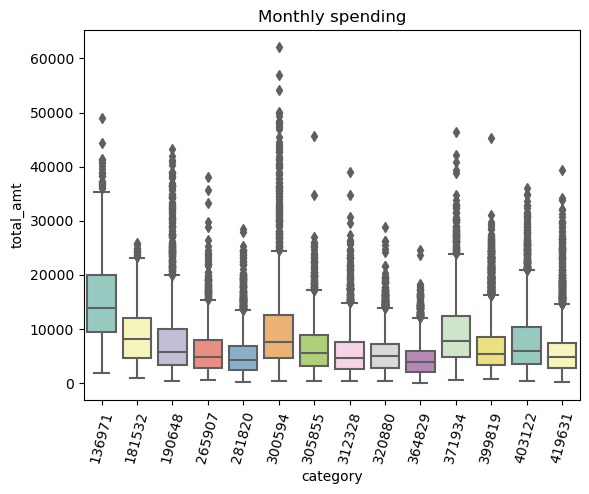

In [216]:
import seaborn as sns

sns.boxplot(x='category', y='total_amt', data=month_spend, palette='Set3')
plt.title('Monthly spending')
plt.xticks(rotation=75)
plt.show()

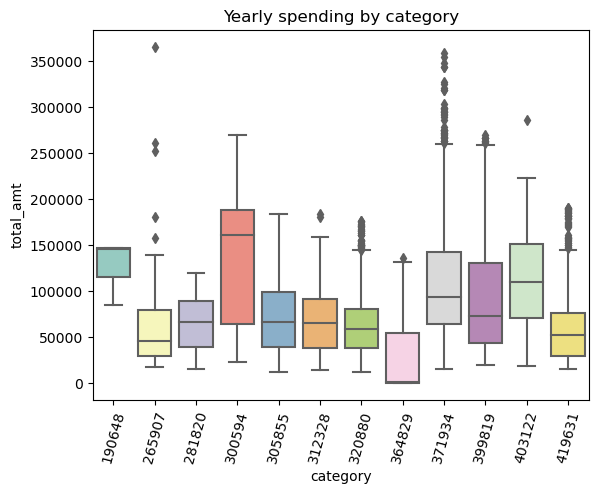

In [217]:
sns.boxplot(x='category', y='total_amt', data=yearspend, palette='Set3')
plt.title('Yearly spending by category')
plt.xticks(rotation=75)
plt.show()

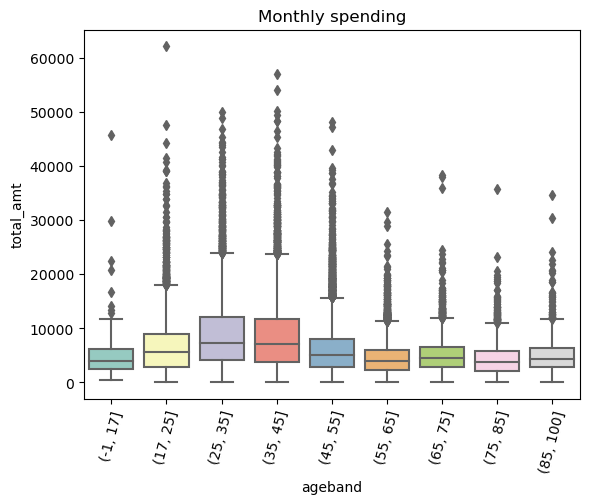

In [218]:
sns.boxplot(x='ageband', y='total_amt', data=month_spend, palette='Set3')
plt.title('Monthly spending')
plt.xticks(rotation=75)
plt.show()

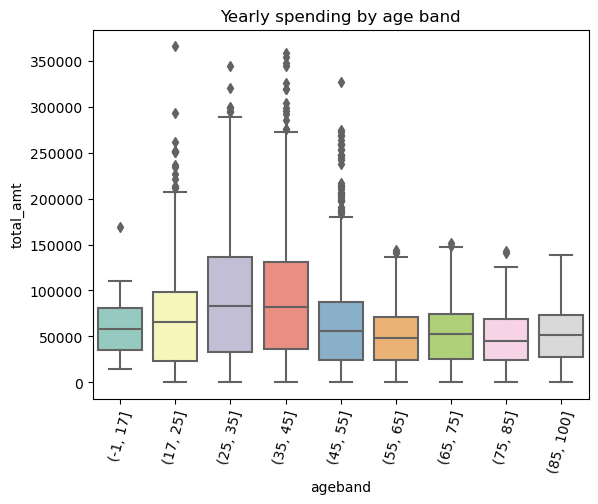

In [219]:
sns.boxplot(x='ageband', y='total_amt', data=yearspend, palette='Set3')
plt.title('Yearly spending by age band')
plt.xticks(rotation=75)
plt.show()

Converting job (> 500 jobs) and category (14 unique categories) to numeric data using Frequency Encoding 

There are 14 unique categories. Let's use frequency encoding to encode as numeric

In [ ]:
#dff['category'].hist(grid=False, xrot=90)

In [ ]:
dff.category.value_counts().to_dict()

In [ ]:
dff_category_frmap = dff.category.value_counts().to_dict()

In [ ]:
dff.category = dff.category.map(dff_category_frmap)

In [ ]:
dff.job.value_counts().to_dict()

In [ ]:
dff_jobfrmap = dff.job.value_counts().to_dict()

In [ ]:
dff.job = dff.job.map(dff_jobfrmap)

Let's convert the object mth_year to numeric

In [408]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff['mth_year_le'] = le.fit_transform(dff['mth_year'])
dff['mth_year_le'].head(n=20)

0     29
1     45
2     13
3      4
4     17
5     18
6     26
7     41
8      2
9     35
10    17
11     9
12     1
13    23
14    46
15    14
16    45
17    31
18    33
19     1
Name: mth_year_le, dtype: int64

Next, define month_spend2 dataframe using numeric mth_year 

In [410]:
month_spend2 = dff.groupby(['acct_num', 'mth_year_le']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'ageband': 'first',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first',
    'weekday': 'first',
    
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()
        
month_spend2.columns = ['acct_num', 'mth_year_le', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday' 'mean_amt', 'max_amt', 'min_amt', 'total_amt']


#yearly spend

#With thanks to Chuan for demonstrating how to aggregate data in this manner 

yearspend = dff.groupby(['acct_num', 'year']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'ageband': 'first',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first',
    'weekday': 'first',
    
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()
        
yearspend.columns = ['acct_num', 'mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']



ValueError: Length mismatch: Expected axis has 15 elements, new values have 14 elements

In [ ]:
dff.head()

In [ ]:
dff.info()

In [225]:
yearspend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   acct_num   4159 non-null   int64   
 1   mth_year   4159 non-null   int64   
 2   category   4159 non-null   int64   
 3   ageband    4159 non-null   category
 4   gender     4159 non-null   int32   
 5   job        4159 non-null   int64   
 6   city_pop   4159 non-null   int64   
 7   zip        4159 non-null   int64   
 8   mean_amt   4159 non-null   float64 
 9   max_amt    4159 non-null   float64 
 10  min_amt    4159 non-null   float64 
 11  total_amt  4159 non-null   float64 
dtypes: category(1), float64(4), int32(1), int64(6)
memory usage: 346.1 KB


In [294]:
yearspend.isnull().sum()

acct_num     0
mth_year     0
category     0
ageband      0
gender       0
job          0
city_pop     0
zip          0
distance     0
hour         0
weekday      0
mean_amt     0
max_amt      0
min_amt      0
total_amt    0
dtype: int64

## Scale Data##

In [295]:
X = yearspend.drop(columns=['ageband', 'acct_num', 'zip'])

In [296]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Principal Component Analysis

In [297]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [298]:
#make a list to contain the principal components
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_in_ + 1))]
pc_list

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12']

In [299]:
#make a dictionary of the principal components and the variance explained
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11',
  'PC12'],
 'exp_variance': [0.21138989306259734,
  0.134742227445228,
  0.0994552214822281,
  0.09060552398274918,
  0.08334197711587898,
  0.07907147077165123,
  0.07637403163023238,
  0.06511022503138612,
  0.06284304709354568,
  0.0443323664396901,
  0.03384076829731787,
  0.01889324764749497]}

In [300]:
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,0.211390
1,PC2,0.134742
2,PC3,0.099455
3,PC4,0.090606
4,PC5,0.083342
5,PC6,0.079071
6,PC7,0.076374
7,PC8,0.065110
8,PC9,0.062843
9,PC10,0.044332


In [301]:
alt.Chart(pc_df).mark_line().transform_window(
    cum_var='sum(exp_variance)'
).encode(
    x=alt.X('pc:N', sort=list(X.columns)),
    y='cum_var:Q'
).properties(width=600)

alt.Chart(...)

In [302]:
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([-0.50766544,  0.11267572, -0.01123212, -0.03992423, -0.02127234,
         0.01432489,  0.30255923, -0.36894663,  0.21587368, -0.35942805,
         0.427986  , -0.3749353 ]),
 'PC2': array([ 0.09618783,  0.19741411, -0.43637709,  0.13874561, -0.05694691,
         0.0635626 , -0.02629387,  0.09592887,  0.64866593,  0.16797582,
         0.33109286,  0.40782047]),
 'PC3': array([ 0.00479517, -0.56008509,  0.32849754,  0.48207163,  0.27637943,
         0.04361981, -0.23688386, -0.18774054,  0.12599563,  0.23428102,
         0.32238083, -0.04046428]),
 'PC4': array([ 0.14729129, -0.41084938, -0.06774114, -0.51777574, -0.50939913,
        -0.09090163, -0.34123114,  0.05703005,  0.14656616,  0.04772179,
         0.23334405, -0.26679079]),
 'PC5': array([ 0.0181015 ,  0.04306944, -0.02655358,  0.03686576,  0.10778475,
        -0.98455675, -0.0329953 , -0.08703049,  0.02734882, -0.02115859,
         0.02527584,  0.06546851]),
 'PC6': array([ 0.05099998,  0.04324431, -0.11913707, -

In [303]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.507665,0.096188,0.004795,0.147291,0.018101,0.051000,0.128927,0.010025,-0.073787,-0.259004,0.780940,0.096227
1,0.112676,0.197414,-0.560085,-0.410849,0.043069,0.043244,0.227981,0.494290,-0.294835,0.241598,0.138723,-0.035697
2,-0.011232,-0.436377,0.328498,-0.067741,-0.026554,-0.119137,0.524218,0.535852,0.207174,-0.228907,-0.099228,0.122243
3,-0.039924,0.138746,0.482072,-0.517776,0.036866,-0.416694,-0.419739,0.167393,0.053542,0.216030,0.213885,0.064763
4,-0.021272,-0.056947,0.276379,-0.509399,0.107785,0.776740,0.084426,-0.193420,-0.006754,-0.025206,0.012597,0.010477
5,0.014325,0.063563,0.043620,-0.090902,-0.984557,0.064026,-0.006041,-0.001393,-0.092385,-0.058684,0.010290,-0.003791
6,0.302559,-0.026294,-0.236884,-0.341231,-0.032995,-0.290127,0.344189,-0.487664,0.472031,-0.087556,0.251284,-0.006797
7,-0.368947,0.095929,-0.187741,0.057030,-0.087030,0.208452,-0.143650,0.241196,0.750503,0.301382,-0.060537,-0.169081
8,0.215874,0.648666,0.125996,0.146566,0.027349,0.103442,0.133398,0.101396,0.180574,-0.081106,-0.087328,0.639483
9,-0.359428,0.167976,0.234281,0.047722,-0.021159,-0.150242,0.536107,-0.265298,-0.175914,0.589439,-0.154867,-0.047428


In [304]:
loadings_df.insert(0,'feature_names', X.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,mth_year,-0.507665,0.096188,0.004795,0.147291,0.018101,0.051000,0.128927,0.010025,-0.073787,-0.259004,0.780940,0.096227
1,category,0.112676,0.197414,-0.560085,-0.410849,0.043069,0.043244,0.227981,0.494290,-0.294835,0.241598,0.138723,-0.035697
2,gender,-0.011232,-0.436377,0.328498,-0.067741,-0.026554,-0.119137,0.524218,0.535852,0.207174,-0.228907,-0.099228,0.122243
3,job,-0.039924,0.138746,0.482072,-0.517776,0.036866,-0.416694,-0.419739,0.167393,0.053542,0.216030,0.213885,0.064763
4,city_pop,-0.021272,-0.056947,0.276379,-0.509399,0.107785,0.776740,0.084426,-0.193420,-0.006754,-0.025206,0.012597,0.010477
5,distance,0.014325,0.063563,0.043620,-0.090902,-0.984557,0.064026,-0.006041,-0.001393,-0.092385,-0.058684,0.010290,-0.003791
6,hour,0.302559,-0.026294,-0.236884,-0.341231,-0.032995,-0.290127,0.344189,-0.487664,0.472031,-0.087556,0.251284,-0.006797
7,weekday,-0.368947,0.095929,-0.187741,0.057030,-0.087030,0.208452,-0.143650,0.241196,0.750503,0.301382,-0.060537,-0.169081
8,mean_amt,0.215874,0.648666,0.125996,0.146566,0.027349,0.103442,0.133398,0.101396,0.180574,-0.081106,-0.087328,0.639483
9,max_amt,-0.359428,0.167976,0.234281,0.047722,-0.021159,-0.150242,0.536107,-0.265298,-0.175914,0.589439,-0.154867,-0.047428


In [305]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC1:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [306]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC2:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [307]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC3:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [308]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC4:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [309]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC5:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [310]:
# Reducing dimensionality to 8 will explain around 90% of variance
pca = PCA(8).fit(X_scaled)

In [311]:
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [312]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.882891,0.335691,1.512200,-0.026262,-0.694778,0.140513,0.891785,0.501973
1,0.578004,-0.880559,-0.120504,-0.961850,-0.991224,-0.004264,0.286721,0.247916
2,0.179937,-1.361951,1.869238,0.320790,1.107089,-0.715360,0.778959,-1.429372
3,-0.258058,-1.437438,1.511248,0.369048,-0.260688,0.038177,0.000181,0.035208
4,-2.097170,0.130797,0.371384,-0.345589,0.042393,0.240903,1.086152,1.295285
...,...,...,...,...,...,...,...,...
4154,-0.617936,-0.280159,1.073049,-0.903334,-0.265896,-0.683689,0.450608,0.487796
4155,1.588299,-1.514046,-0.848722,0.371092,0.209351,-0.377889,0.988179,-0.235732
4156,0.688313,-2.019346,0.734413,1.515823,-1.008063,-0.238734,0.430228,-1.006425
4157,-0.873103,-1.777783,-0.325861,1.837098,1.162193,0.505064,0.026111,0.543436


## K Means Clustering

In [313]:
# determine the number of clusters

cluster_df = pd.DataFrame()
inertia_list = []

In [314]:
cluster_df['nb_cluster'] = range(1, 20)

In [315]:
from sklearn.cluster import KMeans

In [316]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Win

In [317]:
cluster_df['inertia'] = inertia_list

In [318]:
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

In [319]:
k = 6

In [320]:
# train a KMeans model

kmeans = KMeans(random_state=1, n_clusters=k)

In [321]:
kmeans.fit(pca_df)

C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [322]:
pca_df['kmeans'] = kmeans.predict(pca_df)

In [323]:
alt.Chart(pca_df).mark_point().encode(color='kmeans:N').encode(
    x='PC1', 
    y='PC2'
)

alt.Chart(...)

In [421]:
feat_list = ['acct_num', 'mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']

In [423]:
yearspend['kmeans'] = kmeans.predict(X)

ValueError: Length of values (43759) does not match length of index (4159)

In [422]:
yearspend[feat_list + ['kmeans']].groupby('kmeans').mean()

KeyError: "['kmeans'] not in index"

Let's look at parameters that might influence monthly spending

In [363]:
X = month_spend.drop(columns=['ageband', 'acct_num', 'zip'])

C:\Users\paris\AppData\Local\Temp\ipykernel_27592\1953291267.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = month_spend.drop(columns=['ageband', 'acct_num', 'zip'])


In [364]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [365]:
pca = PCA()
pca.fit(X_scaled)


PCA()

In [366]:
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_in_ + 1))]
pc_list

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12']

In [367]:
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11',
  'PC12'],
 'exp_variance': [0.162379499944566,
  0.11600604621946185,
  0.09334143199747828,
  0.08586124277918496,
  0.08343160534869923,
  0.08127178001567824,
  0.07894514271396989,
  0.07769579425214633,
  0.0754224587883745,
  0.07276909939732819,
  0.04232431793053855,
  0.030551580612573948]}

In [368]:
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,0.162379
1,PC2,0.116006
2,PC3,0.093341
3,PC4,0.085861
4,PC5,0.083432
5,PC6,0.081272
6,PC7,0.078945
7,PC8,0.077696
8,PC9,0.075422
9,PC10,0.072769


In [369]:
alt.Chart(pc_df).mark_line().transform_window(
    cum_var='sum(exp_variance)'
).encode(
    x=alt.X('pc:N', sort=list(X.columns)),
    y='cum_var:Q'
).properties(width=600)

SchemaValidationError: Multiple errors were found.

Error 1: '['mth_year', '']' is an invalid value for `0`. Valid values are of type 'number', 'string', 'boolean', or 'object'.

Error 2: '['category', '<lambda>']' is an invalid value for `1`. Valid values are of type 'number', 'string', 'boolean', or 'object'.

Error 3: '['gender', 'first']' is an invalid value for `2`. Valid values are of type 'number', 'string', 'boolean', or 'object'.

alt.Chart(...)

In [370]:
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([ 6.01937557e-02, -1.12961747e-01, -2.27953307e-01,  1.74549608e-01,
         3.15204221e-04, -1.41618577e-02, -8.18017280e-02,  4.70985964e-02,
         5.31151333e-01,  5.41035947e-01,  4.04396782e-03,  5.63220768e-01]),
 'PC2': array([-0.29409666,  0.15424062, -0.19248572, -0.13445026, -0.11694436,
        -0.00482072,  0.486802  , -0.34297643,  0.38398481, -0.08685765,
         0.53537008, -0.15707137]),
 'PC3': array([-0.11287922, -0.03024488,  0.48126195,  0.54141847,  0.5588807 ,
         0.06778632,  0.0987745 , -0.29299366, -0.07144355,  0.07881016,
         0.18356161,  0.06357756]),
 'PC4': array([ 0.53133354, -0.65811426,  0.1903978 , -0.14522131, -0.18551626,
        -0.16666312,  0.09799258, -0.36552072, -0.00371121, -0.01980437,
         0.14629568, -0.00452824]),
 'PC5': array([ 1.66149482e-01, -9.17189372e-02,  1.41058633e-04, -1.46410483e-01,
         4.86991010e-02,  9.64902858e-01,  1.88365549e-02,  3.25808857e-02,
         4.02957411e-02,  2.04068026e

In [371]:
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.060194,-0.294097,-0.112879,0.531334,0.166149,0.004553,-0.564765,0.259492,0.152222,0.417745,0.041219,0.039029
1,-0.112962,0.154241,-0.030245,-0.658114,-0.091719,0.378628,-0.560655,0.057296,-0.016747,0.205673,-0.121123,0.052712
2,-0.227953,-0.192486,0.481262,0.190398,0.000141,0.587252,0.290481,-0.075475,-0.167314,0.263217,-0.127969,0.307454
3,0.174550,-0.134450,0.541418,-0.145221,-0.146410,-0.384913,-0.179464,-0.516622,0.122878,0.279338,0.274490,0.007659
4,0.000315,-0.116944,0.558881,-0.185516,0.048699,-0.224137,-0.007481,0.730166,0.094817,-0.211182,-0.004821,0.011870
5,-0.014162,-0.004821,0.067786,-0.166663,0.964903,-0.025951,-0.013507,-0.172658,-0.060259,-0.044569,0.001331,0.009005
6,-0.081802,0.486802,0.098775,0.097993,0.018837,-0.280997,0.047716,0.155452,-0.593832,0.468017,-0.117214,-0.214012
7,0.047099,-0.342976,-0.292994,-0.365521,0.032581,-0.128829,0.473629,0.178585,0.222996,0.579228,-0.019217,-0.034944
8,0.531151,0.383985,-0.071444,-0.003711,0.040296,0.046604,0.080314,0.140264,0.022579,0.085877,0.276383,0.671657
9,0.541036,-0.086858,0.078810,-0.019804,0.020407,0.434191,0.057415,0.088039,-0.179450,0.000055,0.366684,-0.571390


In [372]:
loadings_df.insert(0,'feature_names', X.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,"(mth_year, )",0.060194,-0.294097,-0.112879,0.531334,0.166149,0.004553,-0.564765,0.259492,0.152222,0.417745,0.041219,0.039029
1,"(category, <lambda>)",-0.112962,0.154241,-0.030245,-0.658114,-0.091719,0.378628,-0.560655,0.057296,-0.016747,0.205673,-0.121123,0.052712
2,"(gender, first)",-0.227953,-0.192486,0.481262,0.190398,0.000141,0.587252,0.290481,-0.075475,-0.167314,0.263217,-0.127969,0.307454
3,"(job, first)",0.174550,-0.134450,0.541418,-0.145221,-0.146410,-0.384913,-0.179464,-0.516622,0.122878,0.279338,0.274490,0.007659
4,"(city_pop, first)",0.000315,-0.116944,0.558881,-0.185516,0.048699,-0.224137,-0.007481,0.730166,0.094817,-0.211182,-0.004821,0.011870
5,"(distance, first)",-0.014162,-0.004821,0.067786,-0.166663,0.964903,-0.025951,-0.013507,-0.172658,-0.060259,-0.044569,0.001331,0.009005
6,"(hour, first)",-0.081802,0.486802,0.098775,0.097993,0.018837,-0.280997,0.047716,0.155452,-0.593832,0.468017,-0.117214,-0.214012
7,"(weekday, first)",0.047099,-0.342976,-0.292994,-0.365521,0.032581,-0.128829,0.473629,0.178585,0.222996,0.579228,-0.019217,-0.034944
8,"(amt, mean)",0.531151,0.383985,-0.071444,-0.003711,0.040296,0.046604,0.080314,0.140264,0.022579,0.085877,0.276383,0.671657
9,"(amt, max)",0.541036,-0.086858,0.078810,-0.019804,0.020407,0.434191,0.057415,0.088039,-0.179450,0.000055,0.366684,-0.571390


In [373]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC1:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [374]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC2:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [375]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC3:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [376]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC4:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [377]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC5:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [390]:
pca = PCA(12).fit(X_scaled)

In [391]:
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [392]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.525851,-0.173127,0.653449,-1.247126,-0.917944,0.970322,1.102591,-0.392118,1.085234,-0.805771,0.433786,0.992608
1,-0.529226,0.437467,0.776589,0.310470,-0.256410,-1.011022,3.094337,0.099300,-0.790183,0.791385,0.364630,-0.178675
2,-1.590330,-1.187944,0.358308,-2.195883,-0.593375,0.929798,0.902582,-0.371301,0.889611,-0.128497,0.142295,0.081292
3,-0.885002,-0.662327,0.682673,-1.610831,0.828304,0.438628,1.099511,-0.592274,0.237745,-0.263997,-0.175520,0.389454
4,-0.937620,1.200018,1.381863,-0.875230,0.290490,0.679901,-0.041009,-0.517325,-0.678697,-0.583855,-0.038425,0.433938
...,...,...,...,...,...,...,...,...,...,...,...,...
43754,-0.840165,-0.212920,-0.167103,2.324012,-1.236070,1.250580,-0.996415,0.423766,-0.723571,-0.439347,-0.713727,-0.319830
43755,-1.628681,0.224578,-0.840109,0.836403,-0.894470,0.951330,-0.658039,1.133924,-0.766150,1.678139,-0.285052,0.112645
43756,-1.752939,-0.832084,-0.689161,1.189009,1.909142,0.752958,-0.064062,0.320698,-0.092837,0.659690,-0.018013,-0.129395
43757,-1.139824,-0.291112,-0.549595,2.181683,-1.508810,1.442913,-0.874129,0.695932,0.113691,-0.222440,0.220188,0.338588


In [393]:
cluster_df = pd.DataFrame()
inertia_list = []

In [394]:
cluster_df['nb_cluster'] = range(1, 20)

In [395]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [396]:
cluster_df['inertia'] = inertia_list

In [397]:
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))


alt.Chart(...)

In [403]:
k = 4

In [404]:
kmeans = KMeans(random_state=1, n_clusters=k)

In [405]:
kmeans.fit(X)

C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [406]:
pca_df['kmeans'] = kmeans.predict(pca_df)

C:\Users\paris\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


ValueError: X has 13 features, but KMeans is expecting 12 features as input.

In [402]:
alt.Chart(pca_df).mark_point().encode(color='kmeans:N').encode(
    x='PC1', 
    y='PC2'
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

See https://altair-viz.github.io/user_guide/large_datasets.html for information on how to plot large datasets, including how to install third-party data management tools and, in the right circumstance, disable the restriction

alt.Chart(...)

## Mean Shift Model 

We can go back to the scaled data we prepared earlier

In [416]:
X = X_scaled

In [417]:
from sklearn.cluster import MeanShift

meanshift = MeanShift()

In [418]:
#fitting the meanshift model on the data

meanshift.fit(X)

KeyboardInterrupt: 

In [415]:
# saving as a new dataframe
yearspend['meanshift'] = meanshift.predict(X)

In [ ]:
feat_list = ['acct_num', 'mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']
pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

In [ ]:
base = alt.Chart(yearspend).mark_point().encode(color='meanshift:N')
for a, b in pairs:
  base.encode(x=a, y=b).display() 

In [ ]:
yearspend[feat_list + ['meanshift']].groupby('meanshift').mean()

In [ ]:
yearspend.head(20)